In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
seaborn

In [29]:
songs = pd.read_csv('../data/SpotifyCleaned.csv')

In [153]:
songs.head()

genre      artist_name                                         track_name  \
0  Opera   Giuseppe Verdi  Stiffelio, Act III: Ei fugge! … Lina, pensai c...   
1  Opera  Giacomo Puccini  Madama Butterfly / Act 1: ... E soffitto e pareti   
2  Opera  Giacomo Puccini      Turandot / Act 2: Gloria, gloria, o vincitore   
3  Opera   Giuseppe Verdi       Rigoletto, Act IV: Venti scudi hai tu detto?   
4  Opera   Giuseppe Verdi           Don Carlo / Act 4: "Ella giammai m'amò!"   

                 track_id  popularity  acousticness  danceability  \
0  7EsKYeHtTc4H4xWiTqSVZA          21         0.986         0.313   
1  7MfmRBvqaW0I6UTxXnad8p          18         0.972         0.360   
2  7pBo1GDhIysyUMFXiDVoON          10         0.935         0.168   
3  02mvYZX5aKNzdqEo6jF20m          17         0.961         0.250   
4  03TW0jwGMGhUabAjOpB1T9          19         0.985         0.142   

   duration_ms   energy  instrumentalness key  liveness  loudness   mode  \
0       490867  0.23100          0.000431  C#    0.0964   -14.287  Major   
1       176797  0.20100          0.028000  D#    0.1330   -19.794  Major   
2       266184  0.47000          0.020400   C    0.3630    -8.415  Major   
3       288573  0.00605          0.000000   D    0.1200   -33.440  Major   
4       629760  0.05800          0.146000   D    0.0969   -23.625  Major   

   speechiness    tempo time_signature  valence  
0       0.0547   86.001            4/4   0.0886  
1       0.0581  131.798            4/4   0.3690  
2       0.0383   75.126            3/4   0.0696  
3       0.0480   76.493            4/4   0.0380  
4       0.0493  172.935            4/4   0.0382

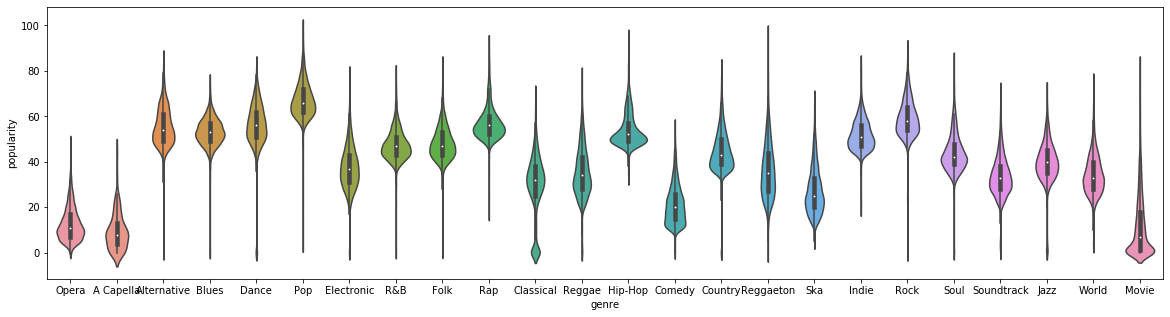

In [52]:
fig_dims = (20, 5)

fig, ax = plt.subplots(figsize = fig_dims)
sns.violinplot(songs.genre, songs.popularity, ax = ax, width = 0.8)

In [120]:
fig = go.Figure()

days = songs.groupby('genre', as_index = False).popularity.median().sort_values(by = 'popularity').reset_index().genre.tolist()

for day in days:
    fig.add_trace(go.Violin(x=songs['genre'][songs['genre'] == day],
                            y=songs['popularity'][songs['genre'] == day],
                            name=day,
                            box_visible=True,
                            meanline_visible=True))

fig.update_layout(
#    paper_bgcolor='rgba(0,0,0,0)',
#    plot_bgcolor='rgba(0,0,0,0.0125)',
    title='Your Title'
)

fig.update_traces(hoverinfo='skip')

# layout = Layout(
#     title='Your Title',
#     (xaxis, yaxis, WHAT EVER YOU WANT TO SET)

#     paper_bgcolor='rgb(233,233,233)', # set the background colour

# )

fig.show()

## sort by ascending medians

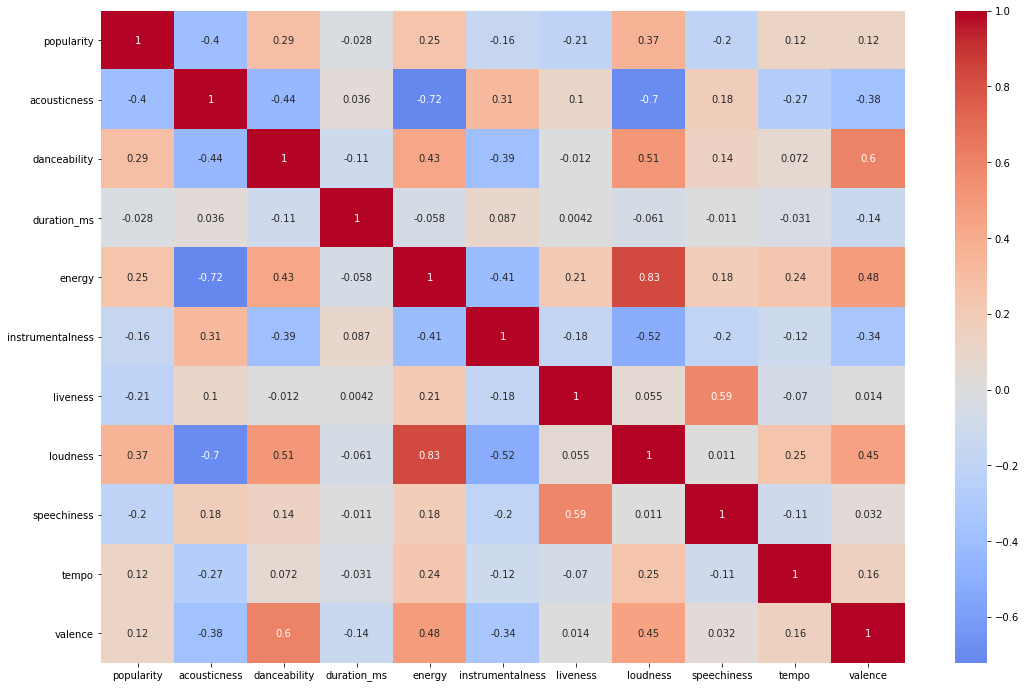

In [131]:
corrM = songs.corr()
div_col = sns.diverging_palette(10, 240, n=9, as_cmap = True)

fig_dims = (18, 12)

fig, ax1 = plt.subplots(figsize = fig_dims)
sns.heatmap(corrM, annot = True, cmap='coolwarm', ax = ax1, center = 0)

In [160]:
songs.groupby('genre').artist_name.describe()

count unique                       top  freq
genre                                                   
A Capella     119     10     The Singers Unlimited    36
Alternative  5300   1137   Five Finger Death Punch    54
Blues        3295    969               Linkin Park    26
Classical    9250    731   Wolfgang Amadeus Mozart   800
Comedy       9677    290             George Carlin   215
Country      7325    754             George Strait   145
Dance        8298    929               Chris Brown   124
Electronic   9149    651                      Moby   154
Folk         7801   1236                 Bob Dylan    78
Hip-Hop      2285    644                    Eminem    47
Indie        2783    947            Arctic Monkeys    72
Jazz         8144   1542               Miles Davis    93
Movie        7555    262              Randy Newman   588
Opera        7891    217            Giuseppe Verdi  1230
Pop          6021   1460                     Drake   154
R&B          4870    894                 Star Cast    55
Rap          4519    657                    Eminem   125
Reggae       8711    642  Bob Marley & The Wailers   380
Reggaeton    8537    457              Daddy Yankee   175
Rock         2070    398               The Beatles   145
Ska          8022    395                      NOFX   277
Soul         5058   1027             Amy Winehouse    72
Soundtrack   8967    298               Hans Zimmer   559
World        8038    511          Hillsong Worship   289

In [145]:
songs[songs['genre'] == 'A Capella']['popularity']

12259     99
12260     99
12261    100
12262     96
12263     97
        ... 
28685     60
28686     62
28687     60
28688     55
28689     58
Name: popularity, Length: 6021, dtype: int64